In [1504]:
# We import the libraries that we will use
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly as py



In [1505]:
# We customize what we want to see
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

In [1506]:
# We upload the data set, we call it "tiburon"
tiburon = pd.read_csv("data/attacks.csv",encoding = "ISO-8859-1")
tiburon


,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1507]:
#We get the info of the database to see the Dtype of lements we have. This might come in handy later on
tiburon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [1508]:
#we cleant the data by first changing all the columns name special characters and spaces into " _ ", 
# this way we wont have any issue when manipulating columns.
#we first make a list with all the original colums, then we print them to see what we want to clean
#on the secon line of code, we replace them and obtain a dictionary with the old names and new names.
#we check again and see if there is any other special character to be cleaned.
columnas = list(tiburon.columns)
print(columnas)
tiburon_two = {columna: columna.replace(" ", "_").replace(".", "_").replace(":", "").lower() for columna in columnas}
print(tiburon_two)




['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22', 'Unnamed: 23']
{'Case Number': 'case_number', 'Date': 'date', 'Year': 'year', 'Type': 'type', 'Country': 'country', 'Area': 'area', 'Location': 'location', 'Activity': 'activity', 'Name': 'name', 'Sex ': 'sex_', 'Age': 'age', 'Injury': 'injury', 'Fatal (Y/N)': 'fatal_(y/n)', 'Time': 'time', 'Species ': 'species_', 'Investigator or Source': 'investigator_or_source', 'pdf': 'pdf', 'href formula': 'href_formula', 'href': 'href', 'Case Number.1': 'case_number_1', 'Case Number.2': 'case_number_2', 'original order': 'original_order', 'Unnamed: 22': 'unnamed_22', 'Unnamed: 23': 'unnamed_23'}


In [1509]:
# in this step we check the columns one by one to see that they are all understandable. 
#we can see that columns like "sex_" have an extra character that must be cleaned. This will be done manually
#It can also be done with Regex, but since its just a few, is faster manually
tiburon_two["Sex "] = "sex"
tiburon_two["Fatal (Y/N)"] = "fatal"
tiburon_two["Species "] = "species"



In [1510]:
#we rename all columns from the dictionary tiburon_two into our dataset, calling it tiburon_renamed.
#we print the head to see that all columns have the correct number.
tiburon_renamed = tiburon.rename(columns=tiburon_two)
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1511]:
# we drop all duplicated rows, since we dont need duplicated data.
tiburon_renamed.drop_duplicates(inplace=True)

In [1512]:
#We check the new shape
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order,unnamed_22,unnamed_23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0,NaN,NaN
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0,NaN,NaN
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1513]:
#Here we can sum all the nans inside the columns
tiburon_renamed.isna().sum()

case_number                  2
date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
case_number_1               10
case_number_2               10
original_order               3
unnamed_22                6311
unnamed_23                6310
dtype: int64

In [1514]:
#as we can see, unnamed 22 and 23 have 99% of the elements as NaN, so we can drop them
tiburon_renamed.drop(["unnamed_22", "unnamed_23"],axis=1,inplace=True)

In [1515]:
tiburon_renamed


,case_number,date,year,type,country,area,location,activity,name,sex,...,fatal,time,species,investigator_or_source,pdf,href_formula,href,case_number_1,case_number_2,original_order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,...,N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,...,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,...,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,...,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,...,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1516]:
# I want to eliminate columns that are the same, mainly because they are useless and take extra space and proccesing time
# This step could had been done before changing the variable names, but I prefer it in this order. 
# All comparison follow the same structure: Check the shape of the dataframe (6312 rows) 
# and see if we get the same amount of rows betwen two columns

In [1517]:
# This is a bit confusing but here it goes:
# 1) After seeing the data head i realized that Date and Case_numbers are all dates that looks the same.
# 2) What I did was to check which rows does case_number and cas_number_2 are not the same, and we got 14 rows
# 3) I displayed them next to date, case_number, case_number_1 and case_number_2 and see if those 14 rows are also dates and similar.
# 4) The conclusion is that all case_number are the same as date and should be drop
tiburon_renamed[["date","case_number","case_number_1","case_number_2"]][(tiburon_renamed["case_number"])!=(tiburon_renamed["case_number_2"])].sample(14)

,date,case_number,case_number_1,case_number_2
4949,Reported 08-Feb-1934,1934.01.08.R,1934.02.08.R,1934.02.08.R
6302,NaN,0,NaN,NaN
5944,May-1864,1864.05,1864.05.00,1864.05.00
6304,NaN,0,NaN,NaN
390,10-Jul-2015,2015.07-10,2015.07.10,2015.07.10
6305,NaN,0,NaN,NaN
5488,Reported 06-Sep-1905,NaN,1905.09.06.R,1905.09.06.R
6309,NaN,0,NaN,NaN
6306,NaN,0,NaN,NaN
25722,NaN,xx,NaN,NaN


In [1518]:
# Since they al reflect date, we will erase all the case_number columns and leave only the date column
tiburon_renamed.drop(["case_number","case_number_1","case_number_2"],axis=1,inplace=True)

In [1519]:
tiburon_renamed



,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
0,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6303.0
1,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6302.0
2,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6301.0
3,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6300.0
4,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6309.0
6308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6310.0
6309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1520]:
# I do this in order to see a cleaner dataframe
tiburon_renamed.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,time,species,investigator_or_source,pdf,href_formula,href,original_order
3011,15-Sep-1981,1981.0,Unprovoked,USA,Florida,"Tampa Bay, Manatee County",Swimming,Mark Meeker,M,26,"FATAL, right calf bitten",Y,P.M.,Said to involve a tiger shark or a hammerhead ...,"S. Pelham, M.D.; NY Times, 9/21/1981, p.18, co...",1981.09.15-Meeker.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3292.0
704,09-Feb-2013,2013.0,Unprovoked,FRENCH POLYNESIA,Society Islands,"Tapu, a dive site on the outer reefs of Bora Bora",Scuba diving,Zohar Kritzer,M,48,Lacerations to right arm & thigh,N,09h00 - 09h30,Lemon shark,"A. Brenneka, Shark Attack Survivors; Les Nou...",2013.02.09-Kritzer.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5599.0
386,23-Jul-2015,2015.0,Provoked,USA,California,"La Jolla, San Diego County",Kayak Fishing,Austin Lorber,M,31,No injury to occupant. Kayak bitten by gaffed ...,N,NaN,"Mako shark, 100-lb","NBC San Diego, 7/27/2015",2015.07.23.b-Lorber.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5917.0
1038,15-Feb-2010,2010.0,Unprovoked,FIJI,Off Vanua Levu,Nara Reef,Scuba diving,Henry Usimewa,M,19,FATAL,Y,09h30,NaN,"Fiji Times, 2/17/2010",2010.02.15-Usimewa.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,5265.0
1456,Reported 17-Jul-2006,2006.0,Invalid,AUSTRALIA,Torres Strait,Western Province,NaN,NaN,NaN,NaN,8 shark-bitten bodies washed ashore,NaN,NaN,Shark involvement prior to death was not confi...,"The Torres News, 7/17/2006",2006.07.17.R-TorresStrait.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4847.0
3485,04-Feb-1968,1968.0,Unprovoked,AUSTRALIA,South Australia,Cape Jervis,Spearfishing,Howard Forster,M,26,"No injury, speargun bitten",N,18h30,"Bronze whaler shark, 3 m [10']","H.D. Baldridge, p.199",1968.02.04-Forster.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2818.0
2030,17-Jul-2000,2000.0,Unprovoked,USA,North Carolina,"Oceanic Pier, Wrightsville Beach, New Hanover ...",Surfing,Patrick G. Bruff,M,16,Foot lacerated,N,NaN,NaN,"C. Creswell, GSAF; Charlotte Observer, 7/20/20...",2000.07.17-Bruff.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,4273.0
5720,Jan-1889,1889.0,Unprovoked,SIERRA LEONE,Western Area,Freetown,Cleaning the side of a ship,English sailor,M,NaN,FATAL,Y,NaN,NaN,"NY Times, 1/20/1889",1889.01.00-EnglishSailor.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,583.0
2477,21-Aug-1993,1993.0,Unprovoked,BAHAMAS,Walkers Cay,"Matinella Reef, 15 to 20 miles west of Walkers...",Spearfishing,William Barnes,M,51,Leg bitten,N,17h15,1.8 m [6'] blacktip shark or Caribbean reef shark,"South Florida Sun Sentinel, 8/22/1993, p. 1A;...",1993.08.21-Barnes.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,3826.0
4845,Reported 16-Jul-1937,1937.0,Unprovoked,AUSTRALIA,Northern Territory,Elcho Island,Pearl diving,A Japanese hard hat diver,M,NaN,FATAL,Y,NaN,NaN,"Mansfield News-Journal, 7/16/1937, p.11",1937.07.16.R-JapaneseDiver.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1458.0


In [1521]:
#here i count the amount of NaN that i have in each column
tiburon_renamed.isna().sum()


date                        10
year                        12
type                        14
country                     60
area                       465
location                   550
activity                   554
name                       220
sex                        575
age                       2841
injury                      38
fatal                      549
time                      3364
species                   2848
investigator_or_source      27
pdf                         10
href_formula                11
href                        10
original_order               3
dtype: int64

In [1522]:
#I decided to drop all the columns that i surely wont use in my hypothesis
tiburon_clean = tiburon_renamed.drop(["species","time","original_order","href","href_formula","pdf","investigator_or_source"],axis=1)

In [1523]:
#By making these lines of code, I can erase all the columns and rows where all values are NaN
tiburon_clean.dropna(axis=0, how='all',inplace=True)
tiburon_clean.dropna(axis=1, how='all',inplace=True)


In [1524]:
# I change all nan for unknow so they arent float anymore.
tiburon_clean.activity.fillna("unknow",inplace=True)

In [1525]:
#In this loop i can check the unique values of each column
# I then print all values and see which function ill create to clean further
for i in tiburon_clean.keys():
    
    print(i, len(list(tiburon_clean[i].unique())))

date 5433
year 250
type 9
country 213
area 826
location 4109
activity 1533
name 5231
sex 7
age 158
injury 3738
fatal 9


In [1526]:
# the first step to clean the date is to create a set of the list of unique values so we can visualize them and understand the data.
# We see that the format is mainly in day-month-year
set(list(tiburon_clean["date"].unique()))

{'24-Apr-2013',
 ' 07-Apr-1877',
 '26-Dec-1957',
 'Reported 14-Jul-1865',
 '04-Jan-2006',
 '26-Mar-1937',
 'Reported 11-Sep-1896',
 '21-Sep-1913',
 '1896',
 '12-May-1962',
 '27-Aug-1934',
 '25-Jul-1985',
 '23-Oct-1926',
 '10-Mar-1891',
 '11-Sep-2011',
 '20-Apr-1924',
 '1748',
 ' 2-Jul-1997',
 '18-Feb-1986',
 '24-May-1950',
 '21-Feb-2017',
 '03-Dec-1959',
 '14-Jun-1931',
 '29-Nov-1891',
 '13-Dec-1929',
 '26-Aug-1962',
 'Reported 22-Apr-1830',
 '03-Jun-1989',
 '18-Mar-2017',
 '12-Nov-2011',
 'Ca. 1881',
 '24-Sep-2005',
 '06-Dec-2011',
 ' 11-Mar-1877',
 '07-Jul-1937',
 '10-Jan-1996',
 'Ca. 1839',
 'Reported 31-Jul-1911',
 '24-Nov-2008',
 '02-Jun-2004',
 '03-Apr-1958',
 '21-Dec-1952',
 'Ca. 1939',
 'Reported 05-Sep-1906',
 '06-Aug-1950',
 '14-Apr-1961',
 '24-Jan-2009',
 '13-Aug-2000',
 '20-Mar-1935',
 'Jul-1964',
 '05-Oct-2011',
 '27-Dec-2008',
 '18-Mar-2009',
 'Dec-1993',
 '06-Apr-2009',
 'Reported 16-Sep-1845',
 '20-Sep-2015',
 '19-Nov-1975',
 '28-Sep-1974',
 '26-Jan-1912',
 '28-May-1965

In [1527]:
#What we want for our first hypothesis is just to see if there is a clear difference between one month and the other
# With this function we can obtain all elements converted to the month we want or an ap.nan
def clean_date(x):
    if "jan" in x or "Jan" in x:
        return "January"
    elif "feb" in x or "Feb" in x:
        return "February"
    elif "mar" in x or "Mar" in x:
        return "March" 
    elif "apr" in x or "Apr" in x:
        return "April"
    elif "may" in x or "May" in x:
        return "May" 
    elif "jun" in x or "Jun" in x:
        return "June"
    elif "jul" in x or "Jul" in x:
        return "July" 
    elif "aug" in x or "Aug" in x:
        return "August"
    elif "sep" in x or "Sep" in x:
        return "September" 
    elif "oct" in x or "Oct" in x:
        return "October"
    elif "nov" in x or "Nov" in x:
        return "November" 
    elif "dec" in x or "Dec" in x:
        return "December"
    else: 
        return np.nan

In [1528]:
#we apply the clean_date function ad create a new column for control
tiburon_clean["clean_date"] = tiburon_clean.date.apply(clean_date)


In [1529]:
#we check that the function worked, giving us the 12 months and some nan
set(list(tiburon_clean["clean_date"].unique()))

{'April',
 'August',
 'December',
 'February',
 'January',
 'July',
 'June',
 'March',
 'May',
 'November',
 'October',
 'September',
 nan}

In [1530]:
# the first step to clean the type is to create a set of the list of unique values so we can visualize them and understand the data.
# We see that the column can be divided between unprovoked, provoked and other values
set(list(tiburon_clean["type"].unique()))
tiburon_clean["type"].value_counts()

Unprovoked      4595
Provoked         574
Invalid          547
Sea Disaster     239
Boating          203
Boat             137
Questionable       2
Boatomg            1
Name: type, dtype: int64

In [1531]:
# With this function we can obtain unprovoked, provoked and NaN depending on the element.
def clean_type(x):
    if x == "Unprovoked":
        return "Unprovoked"
    elif x == "Provoked":
        return "Provoked"
    else:
        return np.nan

In [1532]:
##we apply the function to Type column
tiburon_clean["type"] = tiburon_clean.type.apply(clean_type)

In [1533]:
# we can obtain unprovoked, provoked and NaN depending on the element.
set(list(tiburon_clean["type"].unique()))

{'Provoked', 'Unprovoked', nan}

In [1534]:
# the first step to clean the activity is to create a set of the list of unique values so we can visualize them and understand the data.
# We see that almost all activities are different, but almost all include a verb
set(list(tiburon_clean["activity"].unique()))

{'Put foot inside a landed & supposedly dead shark',
 'Washed off catamaran in the surf',
 'Chumming for sharks',
 'Wreck of the steamship Birkenhead',
 'Attempting to illegally enter the USA',
 'Paddle-boarding',
 'Spearfishing with Joe Turner (24). Shark attracted to speared halibut on belt of one diver, tried to bite Ide\x92s speargun & he shot it in the mouth',
 'Swimming / jumping off a jetty',
 'Swimming, ducking for shells in water 0.9 m deep',
 'Moving shark from tuna vessel when boat rolled, placing both man & shark in chest-deep water',
 'Diving for pearl',
 'Freedom Swimming',
 'Scuba diving',
 'The steamer Tahiti collided with the ferry Greycliffe',
 'A father bathing his smallest daughter when the shark bumped her out of his arms and carried her into deep water',
 'Ferry boat Dona Paz with 4431 passengers exploded & caught fire when she collided with an  oil tanker ',
 'National Airlines DC7B enroute from Miami to Los Angeles with 42 or 46 people on board went down in heav

In [1535]:
# With this function we can obtain all the words ending in ing and assume those are verbs
#There are words like king and morning that are not verbs but we took care of that manually.
def regex_activity(x):
    return "".join(re.findall(r'\b(\w+ing)\b',x)).lower()


In [1536]:
# We apply the function
tiburon_clean["activity_verb"] = tiburon_clean.activity.apply(regex_activity)

In [1537]:
# We obtain a lot of words that finish in ing and that are mainly verbs.
set(list(tiburon_clean["activity_verb"].unique()))


{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'attemptingdrowning',
 'attemptingfishing',
 'attemptingsailing',
 'attemptingswimming',
 'awaiting',
 'bathing',
 'bathingstanding',
 'bathingsurfing',
 'bathingswimming',
 'bathingwashing',
 'bathingwhaling',
 'being',
 'beingfishing',
 'bending',
 'boarding',
 'boardingsurfing',
 'boardingswimming',
 'boardingwading',
 'boating',
 'bodyboarding',
 'bodysurfing',
 'boeing',
 'bringing',
 'burning',
 'canoeing',
 'carrying',
 'casting',
 'catching',
 'chasingbathingriding',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'clingingrowing',
 'collecting',
 'coming',
 'competingfishing',
 'competingrowing',
 'competingspearfishingtowing',
 'competingstanding',
 'conducting',
 'crabbing',
 'crabbingspearing',
 'crawling',
 'crayfishing',
 'crossing',
 'crossingfighting',
 'crossingswimming',
 'crouching',
 'cruising',
 'cutting

In [1538]:
# I open a list that will be filled up with the function below.
nowater =[]

In [1539]:
# Since there are so many different activities, I tried to group them in 6 categories:
# Swimming, Surfing, Fishing, Vessel related (people in boats), close to the water and other activities
# I tried to group as many activities as possible which lead to a considerable amount of useful data
def activity_grouping(x):
    if "swimming" in x or "diving" in x or "snorkel" in x or "drown" in x or "float" in x:
        return "swimming"
    elif "surfing" in x or "board" in x or "paddl" in x: 
        return "surfing"
    elif "netting" in x or "fishing" in x or "shell" in x or "oyster" in x or "lobster" in x or "pearl" in x or "spear" in x or "harpoon" in x or "crab" in x or "shrimp" in x:
        return "fishing"
    elif "yacht" in x or "boat" in x or "kayak" in x or "canoe" in x or "kakay" in x or "sail" in x or "sink" in x or "ski" in x or "row" in x:
        return "vessel related"
    elif "collecting" in x or "washing" in x or "wading" in x or "stand" in x or "knee" in x or "walking" in x or "splash" in x or "bath" in x or "sitting" in x or "tread" in x:
        return "Close to the water"
    else:
        nowater.append(x)
        return "other activity"

In [1540]:
#we apply the function above
tiburon_clean["activity_verb2"] = tiburon_clean.activity_verb.apply(activity_grouping)

In [1541]:
#we check that the function worked
set(list(tiburon_clean["activity_verb2"].unique()))

{'Close to the water',
 'fishing',
 'other activity',
 'surfing',
 'swimming',
 'vessel related'}

In [1542]:
#we count the elements to see the proportion. There is a big number of "other activities" which wont be treaded as np.nan
tiburon_clean["activity_verb2"].value_counts()

swimming              1836
other activity        1294
surfing               1288
fishing               1141
Close to the water     594
vessel related         149
Name: activity_verb2, dtype: int64

In [1543]:
#I left the list of other activities so we can check a few of them
set(list(nowater))

{'',
 'abandoningburning',
 'abandoningburningraging',
 'angling',
 'ascending',
 'attaching',
 'attempting',
 'awaiting',
 'being',
 'bending',
 'boeing',
 'bringing',
 'burning',
 'carrying',
 'casting',
 'catching',
 'checking',
 'chumming',
 'clamming',
 'cleaning',
 'climbing',
 'climbingrepairing',
 'clinging',
 'coming',
 'conducting',
 'crawling',
 'crossing',
 'crossingfighting',
 'crouching',
 'cruising',
 'cutting',
 'dangling',
 'defecating',
 'deserting',
 'dismantling',
 'ditching',
 'dragging',
 'drawing',
 'dropping',
 'during',
 'duringfilming',
 'dynamiting',
 'escaping',
 'escapingblackbirding',
 'examining',
 'exercising',
 'expecting',
 'feeding',
 'feeling',
 'fighting',
 'filming',
 'filmingcarrying',
 'filmingfeeding',
 'finning',
 'fleeing',
 'flying',
 'footing',
 'foundering',
 'gaffing',
 'gaffingattemptingbring',
 'gathering',
 'gigging',
 'grabbing',
 'guarding',
 'hanging',
 'harassing',
 'hauling',
 'helping',
 'hiking',
 'holding',
 'holdingdangling',
 

In [1602]:
tiburon_clean[tiburon_clean["activity_verb"] == "murdering"]


,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2,age_2
5839,13-Oct-1878,1878.0,Unprovoked,NaN,NaN,NaN,Jumped overboard after murdering 2 shipmates,Sherrington,M,unknow,FATAL,Y,October,murdering,other activity,unknow


In [1545]:
tiburon_clean[tiburon_clean["activity_verb"] == "defecating"]

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
4488,1950 - 1951,1950.0,Unprovoked,LIBERIA,Montserrado,Monrovia,Defecating in water beneath the docks,a dock worker,M,NaN,FATAL,Y,NaN,defecating,other activity


In [1546]:
tiburon_clean[tiburon_clean['activity_verb'].str.contains('sleeping')==True]

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2
2387,24-May-1995,1995.0,Unprovoked,FIJI,Yasawa Islands,Waya Island,Sleeping in anchored boat,Kinijioji Vindovi,M,69,"FATAL, hand & leg severely injured by shark th...",Y,May,sleeping,other activity


In [1547]:
# the first step to clean the sex column is to create a set of the list of unique values so we can visualize them and understand the data.
# We see that there are a few unique values, so we wont use a function like before but correct it manually.
set(list(tiburon_clean["sex"].unique())) 

{'.', 'F', 'M', 'M ', 'N', 'lli', nan}

In [1548]:
# here we modified one speceific column with the info we want, getting rid of spaces
tiburon_clean.sex = tiburon_clean.sex.str.strip()

In [1549]:
# we make a dict with the key an value that we want to change
cleandict = {".":np.nan,"lli":np.nan,"N":"M"}
tiburon_clean.sex = tiburon_clean.sex.replace(cleandict)

In [1550]:
#we chech that we did a good job, showing F, M and nan
set(list(tiburon_clean["sex"].unique())) 
       

{'F', 'M', nan}

In [1551]:
# the first step to clean the age column is to create a set of the list of unique values so we can visualize them and understand the data.
# We see that all ages are in number, except a few that either dont make sense or have numbers and the word month.
set(list(tiburon_clean["age"].unique()))

{' ',
 '  ',
 ' 28',
 ' 30',
 ' 43',
 '"middle-age"',
 '"young"',
 '(adult)',
 '1',
 '10',
 '10 or 12',
 '11',
 '12',
 '12 or 13',
 '13',
 '13 or 14',
 '13 or 18',
 '14',
 '15',
 '16',
 '16 to 18',
 '17',
 '17 & 16',
 '17 & 35',
 '18',
 '18 months',
 '18 or 20',
 '18 to 22',
 '19',
 '2 to 3 months',
 '20',
 '20 ',
 '20?',
 '20s',
 '21',
 '21 & ?',
 '21 or 26',
 '21, 34,24 & 35',
 '22',
 '23',
 '23 & 20',
 '23 & 26',
 '24',
 '25',
 '25 or 28',
 '25 to 35',
 '26',
 '27',
 '28',
 '28 & 26',
 '28, 23 & 30',
 '29',
 '2½',
 '3',
 '30',
 '30 & 32',
 '30 or 36',
 '30s',
 '31',
 '31 or 33',
 '32',
 '32 & 30',
 '33',
 '33 & 26',
 '33 & 37',
 '33 or 37',
 '34',
 '34 & 19',
 '35',
 '36',
 '36 & 23',
 '36 & 26',
 '37',
 '37, 67, 35, 27,  ? & 27',
 '38',
 '39',
 '40',
 '40s',
 '41',
 '42',
 '43',
 '44',
 '45',
 '45 ',
 '46',
 '46 & 34',
 '47',
 '48',
 '49',
 '5',
 '50',
 '50 & 30',
 '50s',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 "60's",
 '60s',
 '61',
 '62',
 '63

In [1552]:
#we get rid of all the nan in age column to proceed cleaning
tiburon_clean.age.fillna("unknow",inplace=True)

In [1553]:
#Ricardo, esto fue lo que hiciste: primero querias limpiar la data a numeros asi que en regex usuaste: 
# re.findall(r'\b\d+\b',x)
#Luego para que esa lista pasara a integros usaste: [int(i) for i in re.findall(r'\b\d+\b',x)]
#Para sacar la media en np colocaste: np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])
#por ultimo, para no tener float colocaste: int()

#ok, por que los loops? pues facil, te diste cuenta que la lista peude estar vacia y que te daba error
#por el mean, asi que le pediste que si la lista estaba vacia pues te diera unknow, sino, lo de arriba
def regex_age(x):
    if "month" in x:
        return "unknow"
    else:
        if [int(i) for i in re.findall(r'\b\d+\b',x)] == []:
            return "unknow"
        else:
            return int(np.mean([int(i) for i in re.findall(r'\b\d+\b',x)])) 

In [1554]:
# we create a new column when applying the function
tiburon_clean["age_2"] = tiburon_clean.age.apply(regex_age)

In [1555]:
#we check that the function worked
set(list(tiburon_clean["age_2"].unique()))

{1,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 3,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 5,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 6,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 71,
 72,
 73,
 74,
 75,
 77,
 78,
 8,
 81,
 82,
 84,
 86,
 87,
 9,
 'unknow'}

In [1556]:
#Like in the step before, we see the column andrealize that there are not that many unique values and a function is not needed
set(list(tiburon_clean["fatal"].unique()))

{' N', '2017', 'M', 'N', 'N ', 'UNKNOWN', 'Y', nan, 'y'}

In [1557]:
#we replace nan for unknow
tiburon_clean.fatal.fillna("unknow",inplace=True)

In [1558]:
# We start using strip in order to get read of those with an extra space like " N" and "N "
tiburon_clean.fatal = tiburon_clean.fatal.str.strip()

In [1559]:
#here we change the remaining elements into unknown, N or Y
dict_fatal = {"2017":"unknow","M":"N","UNKNOWN":"unknow","y":"Y"}
tiburon_clean.fatal = tiburon_clean.fatal.replace(dict_fatal)

In [1560]:
#we check that it worked
set(list(tiburon_clean["fatal"].unique()))

{'N', 'Y', 'unknow'}

In [1586]:
#we print a sample to see that everything looks smooth as we wanted 
# we still dont care about the columns name
tiburon_clean.sample(50)

,date,year,type,country,area,location,activity,name,sex,age,injury,fatal,clean_date,activity_verb,activity_verb2,age_2
513,24-Aug-2014,2014.0,Unprovoked,USA,North Carolina,"Off Masonboro Island, New Hanover County",Kite boarding,Miller Diggs,NaN,unknow,Laceration to left foot,N,August,boarding,surfing,unknow
5617,20-Dec-1896,1896.0,Unprovoked,NEW ZEALAND,North Island,"Marine Parade, Napier, Hawke Bay",Bathing,Bright Cooper,M,26,"FATAL, left arm severed at elbow, right arm a...",Y,December,bathing,Close to the water,26
4268,1956,1956.0,Provoked,USA,Virginia,"Virginia Beach, Princess Anne County",Removing shark from net,Josh Vaughan,M,unknow,Punctures on shin & calf PROVOKED INCIDENT,N,NaN,removing,other activity,unknow
3241,09-Feb-1975,1975.0,Unprovoked,AUSTRALIA,Victoria,Anglesea,Crayfishing,John Lear,M,45,Puncture wounds to right shoulder,N,February,crayfishing,fishing,45
5764,Reported 26-Nov-1885,1885.0,NaN,AUSTRALIA,Queensland,Brisbane,unknow,"boat, occupant John Bishop",NaN,unknow,"No injury to occupant, shark bit off section o...",N,November,,other activity,unknow
585,26-Jan-2014,2014.0,Provoked,AUSTRALIA,New South Wales,Umina Beach,Fishing,Richard O'Connor,M,unknow,Lacerations to ring and pinky fingers of his l...,N,January,fishing,fishing,unknow
226,Sep-2016,2016.0,NaN,MEXICO,NaN,Guadalupe Island,Cage Diving,NaN,NaN,unknow,"No injury to divers, white shark breached cage",unknow,September,diving,swimming,unknow
5504,Reported 11-Oct-1904,1904.0,Unprovoked,INDIAN OCEAN,Between Noumea & Sydney,NaN,Fell overboard,Axel Slettsten,M,unknow,FATAL,Y,October,,other activity,unknow
1569,Reported 15-Jul-2005,2005.0,NaN,AUSTRALIA,NaN,NaN,unknow,"Jeff Wells claimed he rescued his ""daughter"" f...",NaN,unknow,"A hoax - No shark was involved and Wells' ""dau...",unknow,July,,other activity,unknow
4190,23-Oct-1957,1957.0,Unprovoked,SOLOMON ISLANDS,Honiara,Honiara,unknow,Melanesian woman,F,28,FATAL,Y,October,,other activity,28


In [1587]:
#Now we drop the columns we wont use
tiburon_hipotesis = tiburon_clean.drop(["location","date","activity","activity_verb","year","area","name","age","country","injury"],axis=1)

In [1590]:
#Due to making the graphs as we want, we will reconvert all the missing values into np.nan
#We do it on each column as we see below
def unknow_nan(x):
    if x == "unknow":
        return np.nan
    elif x == "other":
        return np.nan
    elif x == "return":
        return np.nan
    else:
        return x

In [1591]:
tiburon_hipotesis["fatal"] = tiburon_hipotesis.fatal.apply(unknow_nan)

In [1592]:
tiburon_hipotesis["age_2"] = tiburon_hipotesis.age_2.apply(unknow_nan)

In [1593]:
tiburon_hipotesis["sex"] = tiburon_hipotesis.sex.apply(unknow_nan)

In [1594]:
tiburon_hipotesis["activity_verb2"] = tiburon_hipotesis.activity_verb2.apply(unknow_nan)

In [1595]:
tiburon_hipotesis["clean_date"] = tiburon_hipotesis.clean_date.apply(unknow_nan)

In [1597]:
#We modify the name so they look neat and print our cleaned data
tiburon_hipotesis["date"] = tiburon_hipotesis["clean_date"]
tiburon_hipotesis["age"] = tiburon_hipotesis["age_2"]
tiburon_hipotesis["activity"] = tiburon_hipotesis["activity_verb2"]
tiburon_hipotesis.drop(columns = ["clean_date","activity_verb2","age_2"],axis=1,inplace=True)
tiburon_hipotesis


,sex,fatal,type,date,age,activity
0,F,N,NaN,June,57.0,surfing
1,F,N,Unprovoked,June,11.0,Close to the water
2,M,N,NaN,June,48.0,surfing
3,M,N,Unprovoked,June,NaN,surfing
4,M,N,Provoked,June,NaN,swimming
...,...,...,...,...,...,...
6297,M,Y,Unprovoked,NaN,NaN,swimming
6298,M,Y,Unprovoked,NaN,NaN,swimming
6299,M,Y,Unprovoked,NaN,NaN,swimming
6300,M,Y,Unprovoked,NaN,NaN,other activity


In [1599]:
# We re arrange the columns as we want them
tiburon_hipotesis = tiburon_hipotesis[['date','age','sex','fatal','activity',"type"]]

In [1600]:
tiburon_hipotesis

,date,age,sex,fatal,activity,type
0,June,57.0,F,N,surfing,NaN
1,June,11.0,F,N,Close to the water,Unprovoked
2,June,48.0,M,N,surfing,NaN
3,June,NaN,M,N,surfing,Unprovoked
4,June,NaN,M,N,swimming,Provoked
...,...,...,...,...,...,...
6297,NaN,NaN,M,Y,swimming,Unprovoked
6298,NaN,NaN,M,Y,swimming,Unprovoked
6299,NaN,NaN,M,Y,swimming,Unprovoked
6300,NaN,NaN,M,Y,other activity,Unprovoked


In [1572]:
#tiburon_hipotesis.to_csv("../tiburon_hipotesis.csv",index=False)

<AxesSubplot:xlabel='clean_date', ylabel='count'>

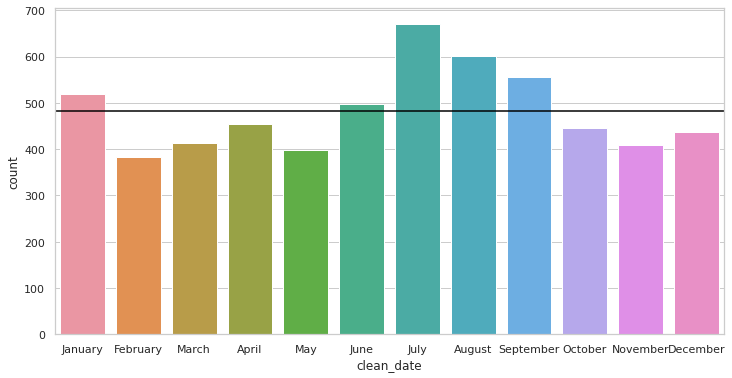

In [1573]:
graph = sns.countplot(x=tiburon_hipotesis["clean_date"], order= ["January","February","March","April","May","June","July","August","September","October","November","December"]);
graph.axhline(y=tiburon_hipotesis["clean_date"].count()/12, c="black", label="HORIZONTAL") #Sobre la horizontal marcamos eje y

graph

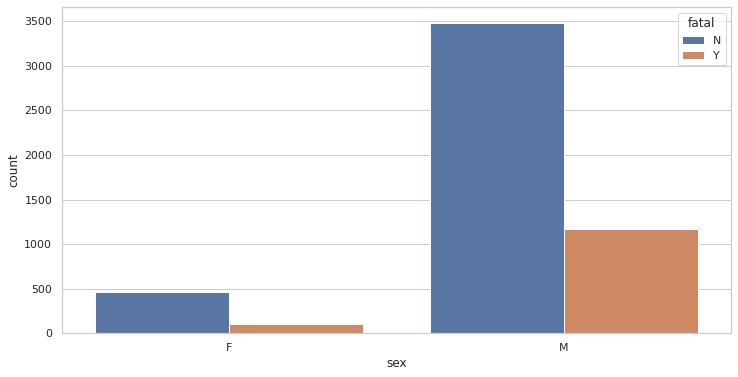

In [1574]:
sns.countplot(x="sex", hue="fatal", data=tiburon_hipotesis);

In [1575]:
#should use shape, rows and column but the brain aint finding it
fat_sex_group = tiburon_hipotesis.groupby(["fatal"])["sex"].value_counts().unstack()
print(fat_sex_group)
print("Deadly encounter female ratio:",(fat_sex_group["F"]["Y"]/(fat_sex_group["F"]["Y"]+ fat_sex_group["F"]["N"])))
print("Deadly encounter male ratio:",(fat_sex_group["M"]["Y"]/(fat_sex_group["M"]["Y"]+fat_sex_group["M"]["N"])))

sex      F     M
fatal           
N      468  3484
Y      107  1174
Deadly encounter female ratio: 0.18608695652173912
Deadly encounter male ratio: 0.25203950193215974


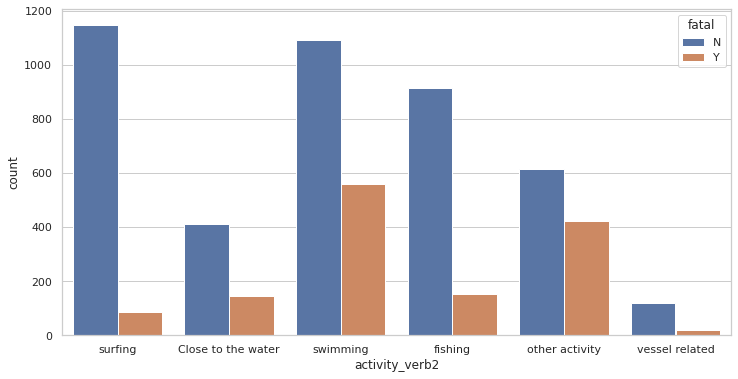

In [1576]:
sns.countplot(x="activity_verb2", hue="fatal", data=tiburon_hipotesis);

In [1577]:
act_fat_group = tiburon_hipotesis.groupby(["fatal"])["activity_verb2"].value_counts().unstack()
print("Close to the water:",(act_fat_group["Close to the water"]["Y"]/(act_fat_group["Close to the water"]["Y"]+ act_fat_group["Close to the water"]["N"])))
print("fishing:",(act_fat_group["fishing"]["Y"]/(act_fat_group["fishing"]["Y"]+act_fat_group["fishing"]["N"])))
print("surfing:",(act_fat_group["surfing"]["Y"]/(act_fat_group["surfing"]["Y"]+act_fat_group["surfing"]["N"])))
print("swimming:",(act_fat_group["swimming"]["Y"]/(act_fat_group["swimming"]["Y"]+act_fat_group["swimming"]["N"])))
print("vessel related:",(act_fat_group["vessel related"]["Y"]/(act_fat_group["vessel related"]["Y"]+act_fat_group["vessel related"]["N"])))
print("other activity:",(act_fat_group["other activity"]["Y"]/(act_fat_group["other activity"]["Y"]+act_fat_group["other activity"]["N"])))


Close to the water: 0.2629695885509839
fishing: 0.14339268978444236
surfing: 0.06963562753036437
swimming: 0.33958837772397094
vessel related: 0.1366906474820144
other activity: 0.40712223291626565


mean: 27.324838898652608
median: 24.0


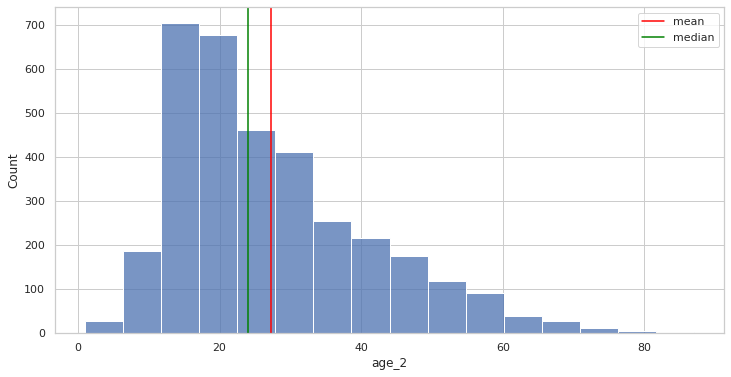

In [1578]:
graf= sns.histplot(x="age_2", data = tiburon_hipotesis, bins=16)
graf.axvline(x=tiburon_hipotesis.age_2.mean(), c="red", label="mean")
graf.axvline(x=tiburon_hipotesis.age_2.median(), c="green", label="median")
plt.legend();
print("mean:",tiburon_hipotesis.age_2.mean())
print("median:",tiburon_hipotesis.age_2.median())

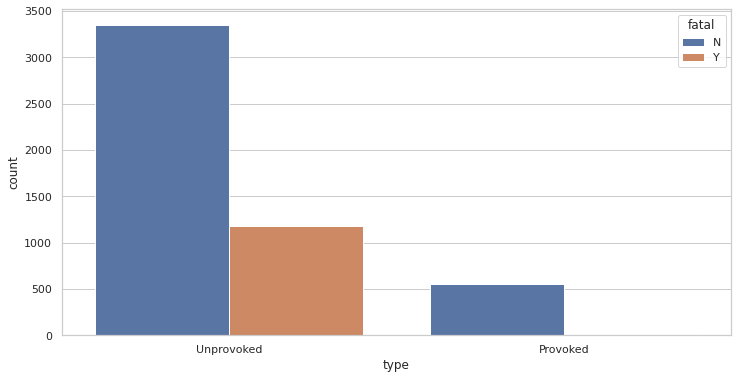

In [1579]:
typ_fat_group = sns.countplot(x="type", hue="fatal", data=tiburon_hipotesis);


In [1580]:
ty_fat_group = tiburon_hipotesis.groupby(["fatal"])["type"].value_counts().unstack()

In [1581]:
ty_fat_group

type,Provoked,Unprovoked
fatal,,
N,549,3351
Y,19,1181


<AxesSubplot:xlabel='age_2', ylabel='Density'>

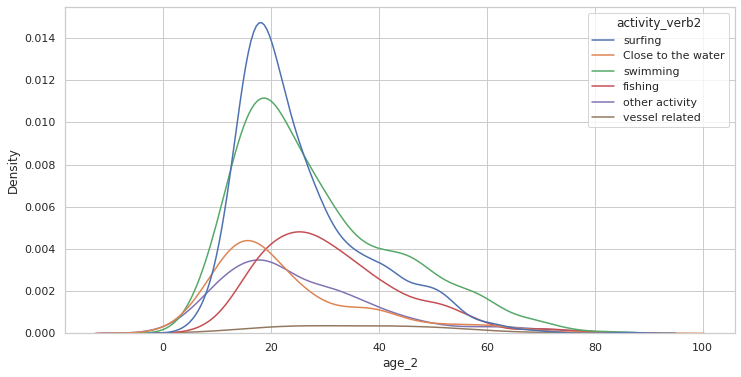

In [1582]:
sns.kdeplot(x=tiburon_hipotesis.age_2, hue=tiburon_hipotesis.activity_verb2)

In [1583]:
groupby3=tiburon_hipotesis.groupby(['type','fatal']).agg({'clean_date':'count'}).reset_index().rename(columns={"clean_date":"count"})
groupby3

,type,fatal,count
0,Provoked,N,520
1,Provoked,Y,17
2,Unprovoked,N,3151
3,Unprovoked,Y,1012


In [1584]:
groupby3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    4 non-null      object
 1   fatal   4 non-null      object
 2   count   4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [1585]:
groupby3["count"].sum()

4700